In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import os
import seaborn as sns
import datetime

### Read Multible data files and Concat them in a single file

In [86]:
files=[file for file in os.listdir('./Sales_Data') ]
all_months_data= pd.DataFrame()
for file in files:
    df=pd.read_csv("./Sales_Data/"+ file)
    all_months_data=pd.concat([all_months_data,df])
###all_months_data.to_csv("all_months_data9999.csv",index=False)
#print(files)
all_months_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


### Save to CSV and read CSV

In [87]:
all_data=pd.read_csv("all_months_data.csv")
#all_data=pd.read_csv('all_months_data.csv', index_col=0, parse_dates=True)


all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


### Renam Cilumens

In [88]:
all_data.rename(columns = {'Order ID':'order_id','Order Date':'order_date','Quantity Ordered':'quantity_ordered','Price Each':'price_each'}, inplace = True)
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   order_id          186305 non-null  object
 1   Product           186305 non-null  object
 2   quantity_ordered  186305 non-null  object
 3   price_each        186305 non-null  object
 4   order_date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [89]:
#missing data
total = all_data.isnull().sum().sort_values(ascending=False)
percent = (all_data.isnull().sum()/all_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
order_id,545,0.002917
Product,545,0.002917
quantity_ordered,545,0.002917
price_each,545,0.002917
order_date,545,0.002917
Purchase Address,545,0.002917


#### ### Elemineate NAs

In [90]:
all_data.dropna(subset=['order_id','order_date','quantity_ordered','price_each'],inplace=True)
 
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   order_id          186305 non-null  object
 1   Product           186305 non-null  object
 2   quantity_ordered  186305 non-null  object
 3   price_each        186305 non-null  object
 4   order_date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


#### Remove Incorrect values 

In [91]:
index = all_data[all_data['order_date'].str[0:1]=='O'].index
all_data.drop(index , inplace=True)
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   order_id          185950 non-null  object
 1   Product           185950 non-null  object
 2   quantity_ordered  185950 non-null  object
 3   price_each        185950 non-null  object
 4   order_date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


### Change text to Date type

In [92]:
all_data['order_date'] =  pd.to_datetime(all_data['order_date'], infer_datetime_format=True)
all_data.head()

,order_id,Product,quantity_ordered,price_each,order_date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


### Add motnth colums

In [93]:
all_data['month'] = all_data['order_date'].dt.month
all_data.tail()

,order_id,Product,quantity_ordered,price_each,order_date,Purchase Address,month
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9
186846,259354,iPhone,1,700,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9
186847,259355,iPhone,1,700,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9
186849,259357,USB-C Charging Cable,1,11.95,2019-09-30 00:18:00,"250 Meadow St, San Francisco, CA 94016",9


### Calculate moth_sale in a new row

In [94]:
all_data['month_sales']= all_data['quantity_ordered'].astype(float) * all_data['price_each'].astype(float)

all_data.head()

,order_id,Product,quantity_ordered,price_each,order_date,Purchase Address,month,month_sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


<AxesSubplot:>

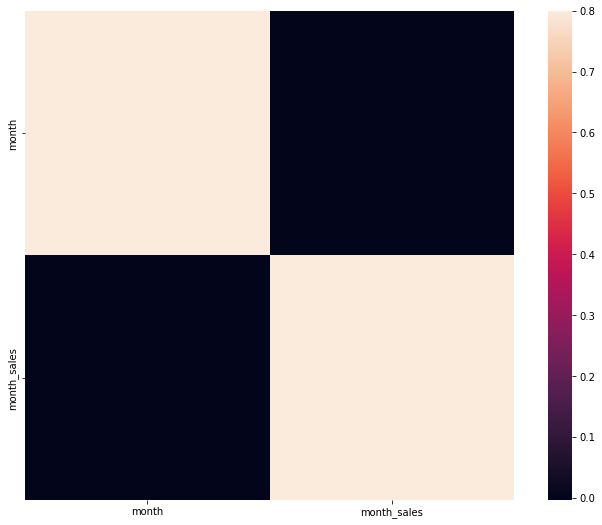

In [95]:
corrmat = all_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

#### order by month

In [96]:
z=all_data.sort_values('month',ascending=False)
z.head()

,order_id,Product,quantity_ordered,price_each,order_date,Purchase Address,month,month_sales
51629,315951,AAA Batteries (4-pack),1,2.99,2019-12-20 11:52:00,"598 Wilson St, San Francisco, CA 94016",12,2.99
38786,303665,27in 4K Gaming Monitor,1,389.99,2019-12-02 09:52:00,"967 Forest St, Dallas, TX 75001",12,389.99
38764,303645,20in Monitor,1,109.99,2019-12-24 18:52:00,"979 Lincoln St, Seattle, WA 98101",12,109.99
38765,303646,Lightning Charging Cable,1,14.95,2019-12-14 12:47:00,"118 West St, Los Angeles, CA 90001",12,14.95
38766,303647,Lightning Charging Cable,1,14.95,2019-12-22 11:36:00,"355 11th St, Dallas, TX 75001",12,14.95


#### find total

In [97]:
sortd_data=all_data.sort_values('month')
summed_data=sortd_data.groupby(['month']).sum().reset_index()
summed_data.sort_values('month_sales',ascending=False)
summed_data.head(20)

,month,month_sales
0,1,1822256.73
1,2,2202022.42
2,3,2807100.38
3,4,3390670.24
4,5,3152606.75
5,6,2577802.26
6,7,2647775.76
7,8,2244467.88
8,9,2097560.13
9,10,3736726.88


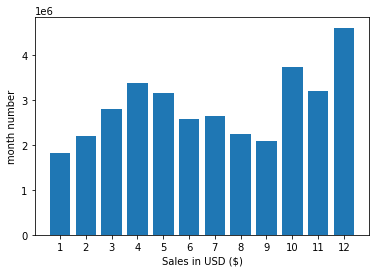

In [98]:
import matplotlib.pyplot as plt
months=range(1,13)
plt.bar(months, summed_data['month_sales'])
plt.xticks(months)
plt.ylabel('month number')
plt.xlabel('Sales in USD ($)')
plt.show()

### Extract City from address

In [99]:
df2 =all_data["Purchase Address"].apply(lambda x: x.split(","))
all_data['city_purchase'] =  df2.apply(lambda x: " ".join(x[1].split()[0:]))
all_data.head()

,order_id,Product,quantity_ordered,price_each,order_date,Purchase Address,month,month_sales,city_purchase
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [100]:

city_sales_sorted=all_data.sort_values('month_sales')
city_sales_data=city_sales_sorted.groupby(['city_purchase']).sum().reset_index()
city_sales_data.sort_values('month_sales',ascending=False)
##city_sales_data.head(30)

,city_purchase,month,month_sales
7,San Francisco,315520,8262203.91
4,Los Angeles,208325,5452570.80
5,New York City,175741,4664317.43
2,Boston,141112,3661642.01
0,Atlanta,104794,2795498.58
3,Dallas,104620,2767975.40
8,Seattle,104941,2747755.48
6,Portland,87765,2320490.61
1,Austin,69829,1819581.75


### Best sale per citiy

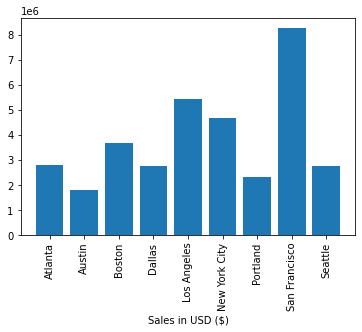

In [101]:
##import matplotlib.pyplot as plt
bins = [0, 5, 10, 100]
#months=range(1,13)
plt.bar(city_sales_data['city_purchase'], city_sales_data['month_sales'])
plt.xticks(city_sales_data['city_purchase'])
plt.xticks(rotation=90)
#plt.yticks(bins)
#plt.yticks(city_sales_data['month_sales'])
#plt.ylabel(city_sales_data['month_sales'])
plt.xlabel('Sales in USD ($)')
plt.show()

### Best time fo AD

In [102]:
all_data['hour']= all_data['order_date'].dt.hour
all_data['minute']= all_data['order_date'].dt.minute
all_data['count'] = 1
all_data.head()


,order_id,Product,quantity_ordered,price_each,order_date,Purchase Address,month,month_sales,city_purchase,hour,minute,count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22,30,1
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,38,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9,27,1


### The best time for AD is 11am or 19(7)pm

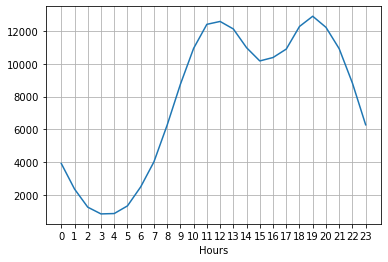

In [104]:
hours=[hour for hour, df in all_data.groupby('hour')]
plt.plot(hours, all_data.groupby(['hour']).count()['count'])
plt.xticks(hours)
plt.xlabel('Hours')
plt.grid()
plt.show()

### What is the items are most often sold together

In [105]:
df=all_data[all_data['order_id'].duplicated(keep=False)]
df['grouped']= df.groupby('order_id')['Product'].transform(lambda x:','.join(x))
df.head()

C:\Users\majdi\AppData\Local\Temp\ipykernel_9096\3214284028.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['grouped']= df.groupby('order_id')['Product'].transform(lambda x:','.join(x))


,order_id,Product,quantity_ordered,price_each,order_date,Purchase Address,month,month_sales,city_purchase,hour,minute,count,grouped
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,38,1,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,38,1,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,19,42,1,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,19,42,1,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston,11,31,1,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [106]:
df= df[['order_id','grouped']].drop_duplicates()
df.head(50)

,order_id,grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
129,176681,"Apple Airpods Headphones,ThinkPad Laptop"
138,176689,"Bose SoundSport Headphones,AAA Batteries (4-pack)"
189,176739,"34in Ultrawide Monitor,Google Phone"
225,176774,"Lightning Charging Cable,USB-C Charging Cable"
233,176781,"iPhone,Lightning Charging Cable"


## Count the most repeated pairs of product

In [107]:
from itertools import combinations
from collections import Counter

count = Counter()
df2= all_data
#df2=df2[]
for row in df['grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### What product sold the most? Why do you think it sold the most?

In [111]:
df2= all_data
df2['no_item_sold']=df2['quantity_ordered']
df2.head()

,order_id,Product,quantity_ordered,price_each,order_date,Purchase Address,month,month_sales,city_purchase,hour,minute,count,no_item_sold
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8,46,1,2
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22,30,1,1
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,38,1,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,38,1,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9,27,1,1


In [115]:
df3=all_data
df3['quantity_ordered'] = pd.to_numeric(df3['quantity_ordered'], errors='coerce')#.inplace=True
most_sold= df3.groupby(['Product']).sum().sort_values(['quantity_ordered'],ascending=False)
most_sold.head(30)

,quantity_ordered,month,month_sales,hour,minute,count,no_item_sold
Product,,,,,,,
AAA Batteries (4-pack),31017,146370,92740.83,297332,612113,20641,31017
AA Batteries (4-pack),27635,145558,106118.40,298342,609039,20577,27635
USB-C Charging Cable,23975,154819,286501.25,314645,647586,21903,23975
Lightning Charging Cable,23217,153092,347094.15,312529,634442,21658,23217
Wired Headphones,20557,133397,246478.43,271720,554023,18882,20557
Apple Airpods Headphones,15661,109477,2349150.00,223304,455570,15549,15661
Bose SoundSport Headphones,13457,94113,1345565.43,192445,392603,13325,13457
27in FHD Monitor,7550,52558,1132424.50,107540,219948,7507,7550
iPhone,6849,47941,4794300.00,98657,201688,6842,6849


([<matplotlib.axis.XTick at 0x202e2345970>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

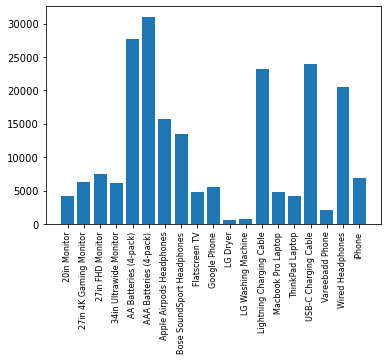

In [126]:
df3=all_data
df3['quantity_ordered'] = pd.to_numeric(df3['quantity_ordered'], errors='coerce')#.inplace=True
product_group=df3.groupby(['Product'])
quantity_ordered= product_group.sum()['quantity_ordered']
products=[product for product, df in product_group]
plt.bar(products,quantity_ordered)
plt.xticks(products, rotation='vertical', size=8)

In [125]:
#keys = [pair for pair in df3]
#plt.bar(most_sold['Product'], most_sold['quantity_ordered'])
#plt.xticks(most_sold['quantity_ordered'], rotation='vertical', size=8)
#plt.show()